<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan diri
## Nama : Derfansyah Guswiranata Kurnia (wira)
## id dicoding: dgkurnia
## email dicoding : weerakurnia@gmail.com

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#inisiasi perpustakaan awal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#impor data dr google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Perpustakaan untuk sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [4]:
#impor akurasi
from sklearn.metrics import accuracy_score

In [5]:
#impor model
from sklearn.feature_selection import SelectFromModel

In [6]:
#klasifikais hutan
from sklearn.ensemble import RandomForestClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [7]:
#Inisiasi pengunduhan dataset dr google
clabnb = pd.read_csv('/content/drive/MyDrive/csv-files/clusairbnb.csv')
#persiapan salinan
clabnbii = clabnb.copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Persiapan segmentasi (pengabaian identitas untuk kemudahan)
clabnbii[['id','host_id']] = clabnbii[['id','host_id']].astype(str).copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#persiapan pengujian kluster
clsinvst = clabnbii.iloc[:, 9:].copy() #cek dari harga
clsinvst = clsinvst.drop('last_review', axis=1).copy() #kolom tanggal tak usah
clsinvst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   price                           48895 non-null  int64 
 1   minimum_nights                  48895 non-null  int64 
 2   number_of_reviews               48895 non-null  int64 
 3   reviews_per_month               48895 non-null  int64 
 4   calculated_host_listings_count  48895 non-null  int64 
 5   availability_365                48895 non-null  int64 
 6   Cluster                         48895 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.6+ MB


In [10]:
#Identifikasi kluster dahulu melalui deklarasi kluster
kelcl = clsinvst['Cluster'].unique().copy()
kelcl
#ke pemecahan

array(['unit asing', 'unit kurang populer', 'opsi pelancong irit',
       'sesi unit favorit di musim tertentu',
       'bisa untuk portofolio pemilik', 'unit sangat direkomendasikan',
       'ada perencanaan dulu'], dtype=object)

In [11]:
#pemecahan
[kelcli, kelclii, kelcliii, kelcliv, kelclv, kelclvi, kelclvii] = kelcl #pemecahan menjadi satu komponen
print(kelcli) #cek satu komponen

unit asing


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [12]:
#Inisiasi pemisahan
ycl = clsinvst['Cluster'].copy()
ycl.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: Cluster
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB


In [14]:
#sumbu x (X)
Xcl = Xcl = clsinvst.drop('Cluster', axis=1).copy() #di luar kluster
Xcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           48895 non-null  int64
 1   minimum_nights                  48895 non-null  int64
 2   number_of_reviews               48895 non-null  int64
 3   reviews_per_month               48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


Nilai x (pembanding) adalah parameter lain

In [13]:
#Numerisasi kluster dengan 'tiruan'
yclnum = pd.get_dummies(ycl).reset_index(drop=True).copy()
yclnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   ada perencanaan dulu                 48895 non-null  bool 
 1   bisa untuk portofolio pemilik        48895 non-null  bool 
 2   opsi pelancong irit                  48895 non-null  bool 
 3   sesi unit favorit di musim tertentu  48895 non-null  bool 
 4   unit asing                           48895 non-null  bool 
 5   unit kurang populer                  48895 non-null  bool 
 6   unit sangat direkomendasikan         48895 non-null  bool 
dtypes: bool(7)
memory usage: 334.4 KB


Nilai yang dibandingkan adalah numerisasi kluster

### Rincian unit yang diperiksa
- Unit y adalah numerisasi kluster
- Unit X adalah unit lain

In [15]:
#Pemisahan pelatihan dan tes
Xcltrain, Xcltest, ycltrain, ycltest = train_test_split(Xcl, yclnum, test_size=0.25, random_state=40)

In [16]:
#Cek komponen
print(Xcltrain.shape)
print(Xcltest.shape)
print(ycltrain.shape)
print(ycltest.shape)

(36671, 6)
(12224, 6)
(36671, 7)
(12224, 7)


Aspek yang diperiksa
* i. Xcltrain = klasifikasi sumbu 'X' untuk latihan
* ii. Xcltest = klasifikasi sumbu 'X' untuk pengujian   
* iii. ycltrain = klasifikasi sumbu 'y' untuk latihan
* iv. ycltest = klasifikasi sumbu 'y' untuk pengujian

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
#Inisiasi rcf (seleksi fitur demi efisiensi ram)
pilihan = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=40))
pilihan.fit(Xcltrain, ycltrain) #pelatihan untuk Xcl dan ycl (klasifikasi X dan y)
#seleksi pelatihan
Xtrpil = pilihan.transform(Xcltrain) #sumbu X latihan
Xtspil = pilihan.transform(Xcltest) # Sumbu X bagian uji

Tahap pertama adalah penyetelan nilai RCF dengan pilihan model demi efisiensi RAM

In [18]:
#cek bentuk pilihan
print(Xtrpil.shape)
print(Xtspil.shape)

(36671, 3)
(12224, 3)


In [50]:
#Inspeksi nilai ccp alpa yang sesuai (inspeksi kisaran nilai)
nialpf = np.arange(0.0015, 0.15, 7.5e-4) #pemeriksaan nilai
habaik = [] #cek hasil
itmaks = 150 #iterasi tertinggi
tolerance = 0.0175 #toleransi
#iterasi untuk pemeriksaan

In [51]:
# Variables to track the best results
best_alpha = None
best_accuracy = -np.inf  # Awal rendah untuk akurasi
best_f1 = -np.inf  # Awal rendah untuk nilai f1

# Iteration for checking alpha values
for iteration in range(itmaks):
    for alpha in nialpf:
        rclasf = RandomForestClassifier(ccp_alpha=alpha, random_state=40)
        rclasf.fit(Xcltrain, ycltrain)

        # Fasa prediksi
        y_pred = rclasf.predict(Xcltest)

        # Pengubahan nilai argumen
        ycltest_single = np.argmax(ycltest.values, axis=1)
        y_pred_single = np.argmax(y_pred, axis=1)

        # NIlai kalkulasi
        accuracy = accuracy_score(ycltest_single, y_pred_single)
        f1 = f1_score(ycltest_single, y_pred_single, average='weighted')
        precision = precision_score(ycltest_single, y_pred_single, average='weighted')
        recall = recall_score(ycltest_single, y_pred_single, average='weighted')
        conf_matrix = confusion_matrix(ycltest_single, y_pred_single)

        print(f'skor ccp_alpha: {alpha:.3f}, Akurasi: {accuracy:.2f}, '
              f'Nilai F1: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
        print(f'Confusion Matrix:\n{conf_matrix}\n')

        # Pembaruan
        if accuracy > best_accuracy or (accuracy == best_accuracy and f1 > best_f1):
            best_alpha = alpha
            best_accuracy = accuracy
            best_f1 = f1

    print(f'Nilai ccp terbaik setelah iterasi {iteration + 1}: {best_alpha}, '
          f'Akurasi: {best_accuracy:.2f}, Nilai F1: {best_f1:.2f}')

    # Penyetelan dinamis
    nialpf = np.linspace(max(0.001, best_alpha - 0.005), min(0.1, best_alpha + 0.005), num=10)

    # Periksa toleransi
    if iteration > 0 and abs(best_accuracy - previous_best_accuracy) < tolerance:
        print("No significant improvement. Stopping the search.")
        break

    previous_best_accuracy = best_accuracy

# Deklarasi fasa akhir
print(f'Nilai terbaik untuk ccp_alpha: {best_alpha}, '
      f'Akurasi: {best_accuracy:.2f}, Nilai F1: {best_f1:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.96, Nilai F1: 0.95, Precision: 0.94, Recall: 0.96
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 131    0   27    0    0    0    0]
 [   8    0    0  266    0    0    0]
 [ 108    0    0    0 1727    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9676    0    0    0  123    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  21    0    0  253    0    0    0]
 [ 132    0    0    0 1703    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.95, Nilai F1: 0.93, Precision: 0.92, Recall: 0.95
Confusion Matrix:
[[9676    0    0    0  123    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  79    0    0  195    0    0    0]
 [ 140    0    0    0 1695    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.004, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9670    0    0    0  129    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 142    0    0    0 1693    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 162    0    0    0 1673    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9742    0    0    0   57    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 380    0    0    0 1455    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.006, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9745    0    0    0   54    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.007, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9749    0    0    0   50    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 405    0    0    0 1430    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.008, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9746    0    0    0   53    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 426    0    0    0 1409    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.008, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9747    0    0    0   52    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 438    0    0    0 1397    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.009, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9754    0    0    0   45    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 449    0    0    0 1386    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.010, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9766    0    0    0   33    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 513    0    0    0 1322    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.011, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 554    0    0    0 1281    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.011, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 554    0    0    0 1281    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.012, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 555    0    0    0 1280    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.013, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.014, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.014, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.015, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.016, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.017, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.017, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.018, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 723    0    0    0 1112    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.019, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 724    0    0    0 1111    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.020, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 724    0    0    0 1111    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.020, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 746    0    0    0 1089    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.021, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.022, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.023, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.023, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.024, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.025, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.026, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.026, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.027, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.028, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.029, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.029, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 794    0    0    0 1041    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.030, Akurasi: 0.88, Nilai F1: 0.85, Precision: 0.85, Recall: 0.88
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 845    0    0    0  990    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.031, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.032, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.032, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.033, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.034, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.035, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.035, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.036, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.037, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.038, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.038, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.039, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.040, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.041, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.041, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.042, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.043, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.044, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.044, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.045, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.046, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.047, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.047, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.048, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.049, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.050, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.050, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.051, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.052, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.053, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.053, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.054, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.055, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.056, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.056, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.057, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.058, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.059, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.059, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.060, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.061, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.062, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.062, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.063, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.064, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.065, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.065, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.066, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.067, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.068, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.068, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.069, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.070, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.071, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.071, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.072, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.073, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.074, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.074, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.075, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.076, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.077, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.077, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.078, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.079, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.080, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.080, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.081, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.082, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.083, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.083, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.084, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.085, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.086, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.086, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.087, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.088, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.089, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.089, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.090, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.091, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.092, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.092, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.093, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.094, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.095, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.095, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.096, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.097, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.098, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.098, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.099, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.100, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.101, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.101, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.102, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.103, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.104, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.104, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.105, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.106, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.107, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.107, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.108, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.109, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.110, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.110, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.111, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.112, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.113, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.113, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.114, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.115, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.116, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.116, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.117, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.118, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.119, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.119, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.120, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.121, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.122, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.122, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.123, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.124, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.125, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.125, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.126, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.127, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.128, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.128, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.129, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.130, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.131, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.131, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.132, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.133, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.134, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.134, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.135, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.136, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.137, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.137, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.138, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.139, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.140, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.140, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.141, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.142, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.143, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.143, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.144, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.145, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.146, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.146, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.147, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.148, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.149, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.149, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]

Nilai ccp terbaik setelah iterasi 1: 0.0015, Akurasi: 0.96, Nilai F1: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.001, Akurasi: 0.97, Nilai F1: 0.96, Precision: 0.96, Recall: 0.97
Confusion Matrix:
[[9678    0    0    0  121    0    0]
 [  62    0    0    0    0    0    0]
 [  46    0  112    0    0    0    0]
 [   7    0    0  267    0    0    0]
 [  91    0    0    0 1744    0    0]
 [  50    0    0    0    0   20    0]
 [  23    0    0    1    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [   9    0    0  265    0    0    0]
 [ 112    0    0    0 1723    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9678    0    0    0  121    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  21    0    0  253    0    0    0]
 [ 132    0    0    0 1703    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.95, Nilai F1: 0.93, Precision: 0.92, Recall: 0.95
Confusion Matrix:
[[9675    0    0    0  124    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  77    0    0  197    0    0    0]
 [ 138    0    0    0 1697    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.94, Nilai F1: 0.93, Precision: 0.92, Recall: 0.94
Confusion Matrix:
[[9672    0    0    0  127    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  97    0    0  177    0    0    0]
 [ 139    0    0    0 1696    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.004, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9674    0    0    0  125    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 146    0    0    0 1689    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 162    0    0    0 1673    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9742    0    0    0   57    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 386    0    0    0 1449    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.006, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9744    0    0    0   55    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]

skor ccp_alpha: 0.007, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9749    0    0    0   50    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]

Nilai ccp terbaik setelah iterasi 2: 0.001, Akurasi: 0.97, Nilai F1: 0.96
No significant improvement. Stopping the search.
Nilai terbaik untuk ccp_alpha: 0.001, Akurasi: 0.97, Nilai F1: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
#Dinamisasi variabel 'Rclasifier'
rclasf = RandomForestClassifier(
    random_state=40,
    n_estimators=50,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    warm_start=True,
    ccp_alpha=best_alpha  # Deklarasi nilai alfa terbaik
)

## Tulis narasi atau penjelasan algoritma yang Anda gunakan.
### Urutan penyelesaian tugas
### a. Persiapan nilai RCF **('Randomforestclassifier')** sebelum mengecek hasil
### b. Penyetelan nilai ccp alpha demi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [55]:
# Initialize lists to store metrics
n_estimators_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

# OIterasi untuk nilai matriks
for n_estimators in range(10, 101, 10):
    rclasf.n_estimators = n_estimators
    rclasf.fit(Xcltrain, ycltrain)

    # Prediksi
    y_pred = rclasf.predict(Xcltest)

    # Evaluasi performa
    accuracy = accuracy_score(ycltest, y_pred)
    f1 = f1_score(ycltest, y_pred, average='samples')
    precision = precision_score(ycltest, y_pred, average='samples')
    recall = recall_score(ycltest, y_pred, average='samples')

    # Penyimpanan metrik
    n_estimators_list.append(n_estimators)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)

    print(f'Total Pohon: {n_estimators}, Akurasi: {accuracy:.2f}, Nilai F1: {f1:.2f}, Presisi: {precision:.2f}, Recall: {recall:.2f}')

    if accuracy >= 0.87 and f1 >= 0.87:
        print("Model sudah memenuhi nilai metrik.")
        break
    elif accuracy >= 0.87 and f1 < 0.87:
        print("Akurasi sudah memenuhi, tetapi Nilai F1 belum memenuhi.")
    elif accuracy < 0.87 and f1 >= 0.87:
        print("Nilai F1 sudah memenuhi, tetapi akurasi belum memenuhi.")
else:
    print("Model tidak memenuhi metrik yang diperlukan dengan pengaturan yang diberikan.")

Total Pohon: 10, Akurasi: 0.98, Nilai F1: 0.98, Presisi: 0.98, Recall: 0.98
Model sudah memenuhi nilai metrik.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

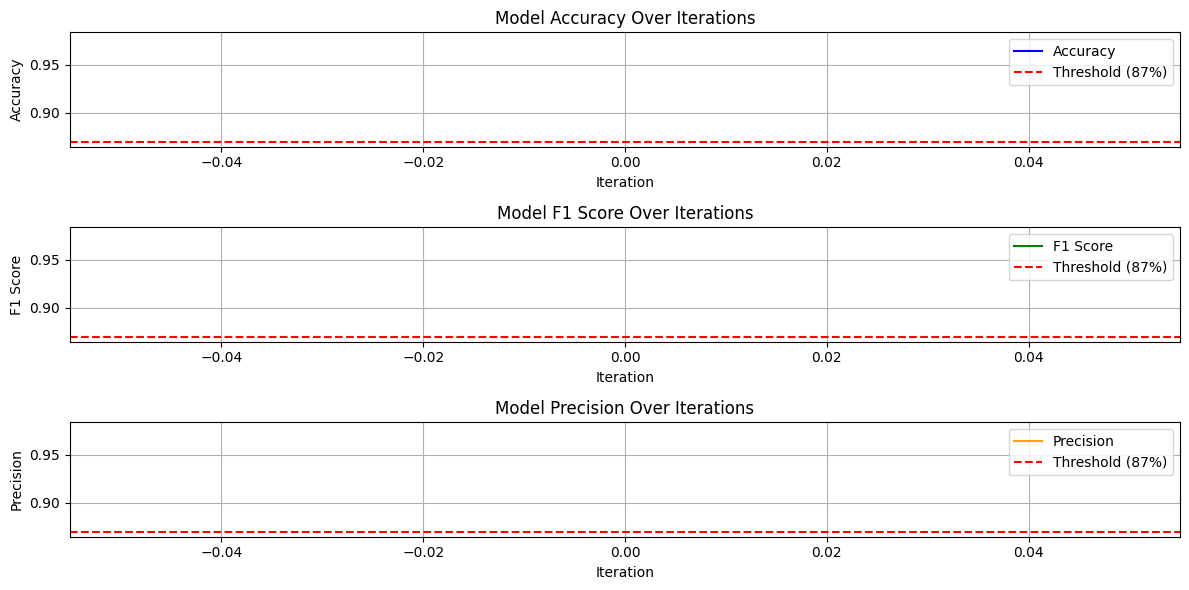

In [56]:
#inspeksi visualisasi normal
threshold = 0.87  # Nilai minimal threshold normal

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.plot(accuracy_list, label='Accuracy', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (87%)')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot F1 Score
plt.subplot(3, 1, 2)
plt.plot(f1_list, label='F1 Score', color='green')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (87%)')
plt.title('Model F1 Score Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

# Plot Precision
plt.subplot(3, 1, 3)
plt.plot(precision_list, label='Precision', color='orange')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (87%)')
plt.title('Model Precision Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [57]:
#Inisiasi gridsearch
param_grid = {'ccp_alpha': np.arange(1.75e-5, 0.175, 1.75e-4)}

In [58]:
# deklarasi rclasifier (pasca grid)
rclfpgd = RandomForestClassifier(random_state=40,
    n_estimators=50,max_depth=8,
    min_samples_split=5,min_samples_leaf=3,
    warm_start=True  # Penerapan 'warm start'
)

In [59]:
#deklarasi pencarian grid
grid_search = GridSearchCV(estimator=rclasf, param_grid=param_grid,
                           scoring='f1_samples', cv=5, verbose=1)

In [ ]:
#Eksekusi pasca penyetelan untuk nilai ccp alpha
grid_search.fit(Xcltrain, ycltrain)

In [42]:
#penyetelan ccp alpha
best_alpha = grid_search.best_params_['ccp_alpha']
best_f1 = grid_search.best_score_
best_accuracy = accuracy_score(ycltest, grid_search.predict(Xcltest))

print(f'Nilai ccp_alpha terbaik adalah : {best_alpha}, Nilai F1: {best_f1:.2f}, Akurasi: {best_accuracy:.2f}')

# Deklarasi nilai alpha
rclasf.ccp_alpha = best_alpha
#ke eksekusi

Nilai ccp_alpha terbaik adalah : 1.5e-05, Nilai F1: 0.99, Akurasi: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Total Trees: 10, Accuracy: 0.98, F1 Score: 0.98, Precision: 0.98, Recall: 0.98


<Figure size 2500x2200 with 0 Axes>

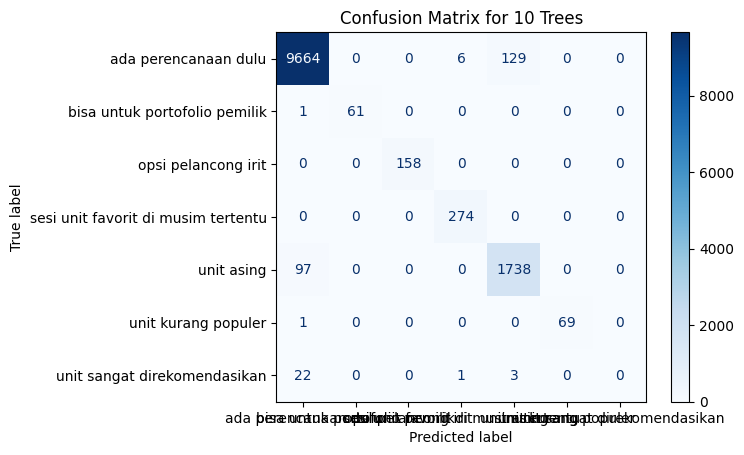

Model memnuhi akurasi metrik.


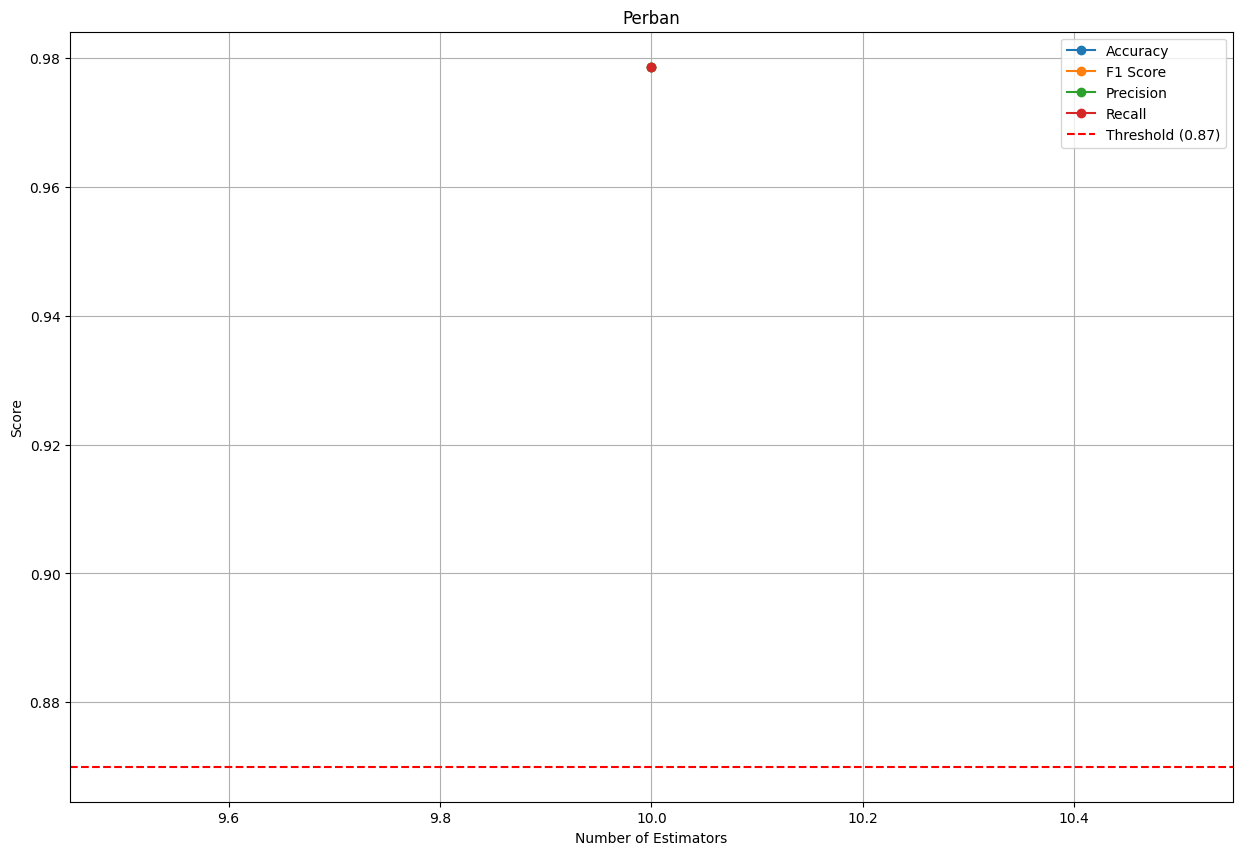

In [49]:
# Eksekusi Bagian deklarasi daftar
accuracies = []
f1_scores = []
precisions = []
recalls = []
n_estimators_list = []

# Eksekusi dengan visualisasi
for n_estimators in range(10, 101, 10):  # From 10 to 100 trees
    rclasf.n_estimators = n_estimators
    rclasf.fit(Xcltrain, ycltrain)

    # Prediksi
    y_pred = rclasf.predict(Xcltest)

    # Evaluate model performance
    accuracy = accuracy_score(ycltest, y_pred)
    f1 = f1_score(ycltest, y_pred, average='samples')
    precision = precision_score(ycltest, y_pred, average='samples')
    recall = recall_score(ycltest, y_pred, average='samples')

    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    n_estimators_list.append(n_estimators)

    print(f'Total Trees: {n_estimators}, Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

    # Replace this with your actual logic to convert to single label if needed
    ycltest_single_label = ycltest.idxmax(axis=1) # Get the label with the highest probability for ycltest
    y_pred_single_label = pd.DataFrame(y_pred, columns=ycltest.columns).idxmax(axis=1)  # Assuming y_pred has same structure as ycltest and get highest probability label for y_pred

    # Deklarasi 'confusion matrik' dalam bentuk singuler
    cm = confusion_matrix(ycltest_single_label, y_pred_single_label)

    # Display confusion matrix
    plt.figure(figsize=(25, 22))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ycltest.columns) # pelabelan untuk penjelasan
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {n_estimators} Trees')
    plt.show()

    # Check if performance meets requirements
    if accuracy >= 0.87 and f1 >= 0.87:
        print("Model memnuhi akurasi metrik.")
        break
    elif accuracy >= 0.87 and f1 < 0.87:
        print("Nilai F1 tidak sesuai, tapi nilai akurasi sesuai.")
    elif accuracy < 0.87 and f1 >= 0.87:
        print("Nilai akurasi tidak sesuai, tapi nilai F1 sesuai.")
else:
    print("Model tidak sesuai.")

# Visualization of metrics across different numbers of estimators
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_list, accuracies, label='Accuracy', marker='o')
plt.plot(n_estimators_list, f1_scores, label='F1 Score', marker='o')
plt.plot(n_estimators_list, precisions, label='Precision', marker='o')
plt.plot(n_estimators_list, recalls, label='Recall', marker='o')

plt.axhline(y=0.87, color='r', linestyle='--', label='Threshold (0.87)')
plt.title('Perban')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Perbandingan hasil konvesional dengan hasil 'tuning' melalui cvgrid


In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.